In [2]:
import pandas as pd
import numpy as np
import sqlite3
pd.set_option('display.max_columns', None)
import matplotlib as plt
import plotly.express as px
from scipy import stats
import sqlite3

- **Store Analysis**:
    - Categorize the retail liquor stores into different types, chain-super market, specialized
    liquor stores, convenience stores, news stands, tobacco stores,..... and report the relevant statistics.
    - New stores pop up and some of them shut down after a few years. Analyze the store opening dynamics
    and report the findings on store life-cycle, store survival analysis, survial curve, survival
    probabilities, etc. Refine your findings based on the store categories you design. Is it easy for
    the stores to experience sales volume growth? With new stores popping up for competition, how does
    it affect the sales of the existing stores?  
    Does the pie (Gross sales volume in **Iowa**) grow bigger? Do the stores share the bigger pie?
    Does the winner take all or more players share smaller slices?
    - In terms of store inventories, report the varieties of product/product category for different
    store types. 
    What product/product category are the major sales contributors for different types of stores?
    - Study the monthly sales volumes and gross profits (without taking price-discounts into account)
    of the stores. 
    - Use the county population information, 
    say https://www.iowa-demographics.com/counties_by_population, to estimate the stores-per-capita in different
        counties. Use the chain-supermarket **Hy-Vee** as a case study, depict its store distribution
        in different counties of Iowa and the their liquor sales dynamics.
     

### Store Category statistics
- describe for each category
- histogram 


- stores look at store that has the most sales volume, sales, (in which county)
- histogram of sales volume monthly or quarterly
- histogram 

In [3]:
conn = sqlite3.connect("data/liquor.db")
query = '''
SELECT Date, t."Store Number", "Store Type", "Volume Sold"
FROM transactions AS t
LEFT JOIN stores AS s ON t."Store Number" = s."Store Number"
LIMIT(3)
'''
store_numbers = pd.read_sql_query(query, conn)
conn.close()
store_numbers

,Date,Store Number,Store Type,Volume Sold
0,2012-05-03 00:00:00,2636,Liquor Tobacco Store,21.0
1,2012-07-05 00:00:00,3735,Liquor Tobacco Store,1.2
2,2012-03-06 00:00:00,4631,Other,9.0


In [32]:
store_numbers.loc[:,'Date'] = pd.to_datetime(store_numbers.Date)

In [ ]:
store_numbers.groupby([pd.Grouper(key='Date', freq='M'), 'Store Number']).agg({'Volume Sold':'sum'})

In [34]:
df

,L,Store Type,City
0,Liquor,Liquor Tobacco Store,cedar falls
1,Liquor,Other Grocery or Convenience,gowrie
2,Liquor,Convenience Store,waterloo


In [25]:
[x.upper() for x in df['Store Type'].tolist()]

['LIQUOR TOBACCO STORE', 'OTHER GROCERY OR CONVENIENCE', 'CONVENIENCE STORE']

In [33]:
df['Store Type'].map(lambda x: x+' '+x)

0            Liquor Tobacco Store Liquor Tobacco Store
1    Other Grocery or Convenience Other Grocery or ...
2                  Convenience Store Convenience Store
Name: Store Type, dtype: object

In [35]:
df.loc[:,'Store Type']= df['Store Type'].str.upper()

In [36]:
df

,L,Store Type,City
0,Liquor,LIQUOR TOBACCO STORE,cedar falls
1,Liquor,OTHER GROCERY OR CONVENIENCE,gowrie
2,Liquor,CONVENIENCE STORE,waterloo


In [45]:
conn = sqlite3.connect("data/liquor.db")
query2 = '''
SELECT *
FROM stores
WHERE City LIKE 'a_t%'
LIMIT(3);
'''
df = pd.read_sql_query(query2, conn)
conn.close()
df

,Store Number,Store Name,County,County Number,City,Zip Code,Store Location,Address,Store Type
0,2238,adventureland inn,polk,77.0,altoona,50009,POINT (-93.49924000000001 41.658513),3200 adventureland dr,Other
1,2478,prairie meadows,polk,77.0,altoona,50009,missing,one prairie meadows drive,Other
2,2548,hy-vee food store / altoona,polk,77.0,altoona,50009,POINT (-93.465301 41.644041),100 8th street sw,Supermarket


In [27]:
conn = sqlite3.connect("data/liquor.db")
query = '''
SELECT COUNT("Vendor Number")
FROM transactions
WHERE Date BETWEEN '2012-05-03 00:00:00' AND '2012-05-04 00:00:00';
'''
df = pd.read_sql_query(query, conn)
conn.close()
df

,"COUNT(""Vendor Number"")"
0,10445


In [30]:
conn = sqlite3.connect("data/liquor.db")
query = '''
SELECT COUNT("Vendor Number")
FROM transactions
WHERE Date BETWEEN '2012-05-03 00:00:00' AND '2012-05-04 00:00:00';
'''
df = pd.read_sql_query(query, conn)
conn.close()
df

,"COUNT(""Vendor Number"")"
0,10445


# Query Data from db

In [8]:
# query data frame with store and transaction info
conn = sqlite3.connect("data/liquor.db")
query = '''
SELECT Date, t."Store Number", Sale, "Volume Sold", County, "Store Type" 
FROM transactions AS t
LEFT JOIN stores AS s ON t."Store Number" = s."Store Number";

'''
store_df = pd.read_sql_query(query, conn)
conn.close()
store_df.head(3)

,Date,Store Number,Sale,Volume Sold,County,Store Type
0,2012-05-03 00:00:00,2636,123.60,21.0,polk,Liquor Tobacco Store
1,2012-07-05 00:00:00,3735,15.84,1.2,buchanan,Liquor Tobacco Store
2,2012-03-06 00:00:00,4631,116.88,9.0,black hawk,Other


In [9]:
# Make Date column datetime
store_df.loc[:,'Date']=pd.to_datetime(store_df.Date)

In [76]:
store_df.shape

(19445831, 6)

In [1]:
# Date, t."Store Number", "Store Type", "Volume Sold"

### CSV for R
- to create combined bar and line graph for volume sale growth overall and by store type

In [70]:
import datetime
# Create df grouped by year summing volume sales
store_line_vol_y= store_df.groupby([pd.Grouper(key='Date', freq='Y')]).agg({'Volume Sold':'sum'}).reset_index()

# Create column Year
store_line_vol_y['Year'] = pd.DatetimeIndex(store_line_vol_y['Date']).year

# Convert Volume column to millions of dollars
store_line_vol_y['Volume Sold'] = store_line_vol_y['Volume Sold']/1000000

In [74]:
# Create df group by Y and Store type sum volume sold
store_bar_p_y = store_df.groupby([pd.Grouper(key='Date', freq='Y'),'Store Type']).agg({'Volume Sold':'sum'}).reset_index()

# Create column Percent for normalized store volumes sold
store_bar_p_y['Percent'] = store_bar_p_y.groupby([pd.Grouper(key='Date', freq='Y')]).transform(lambda x: (x/sum(x))*17.5)

# Create year column
store_bar_p_y['Year'] = pd.DatetimeIndex(store_bar_p_y['Date']).year

In [75]:
# Merge dataframes
store_r = pd.merge(store_bar_p_y,store_line_vol_y,how='left', on= 'Year')

# Get rid of 2020 data
store_r = store_r.loc[store_r.Year!=2020]

# and write to csv for R
# store_r.to_csv('data/store_r.csv',index=False)

## EDA

##### Overall Sales and Volumn Sold

In [5]:
store_df.describe()

,Sale,Volume Sold
count,1.944582e+07,1.944583e+07
mean,1.344986e+02,9.119876e+00
std,4.545768e+02,3.308114e+01
min,0.000000e+00,0.000000e+00
25%,3.150000e+01,1.500000e+00
50%,7.140000e+01,5.000000e+00
75%,1.387200e+02,1.050000e+01
max,2.795573e+05,1.500000e+04


##### Sale and Volume by Store Type

In [85]:
store_type_g = store_df.groupby('Store Type')
store_type_g.describe()


Sale                                      \
                                  count        mean         std  min    25%   
Store Type                                                                    
Casino                          28962.0  225.206701  544.448437  0.0  68.58   
Convenience Store             2910468.0   90.233113  133.059830  0.0  28.98   
Drug Store                    1168147.0  117.932000  316.143288  0.0  34.48   
Liquor Tobacco Store          5747389.0  121.280040  316.117998  0.0  24.76   
Other                         1126275.0  147.609663  421.133700  0.0  28.92   
Other Grocery or Convenience  1030733.0   91.891631  179.468940  0.0  27.98   
Supermarket                   7433847.0  168.219996  636.991822  0.0  43.48   

                                                        Volume Sold  \
                                 50%     75%        max       count   
Store Type                                                            
Casino                        146.40  252.72   27612.00     28962.0   
Convenience Store              64.00  117.00   28998.00   2910468.0   
Drug Store                     71.46  132.24   34619.76   1168150.0   
Liquor Tobacco Store           64.02  132.78   69081.60   5747392.0   
Other                          68.40  143.97   51012.00   1126275.0   
Other Grocery or Convenience   61.90  106.56   18816.00   1030733.0   
Supermarket                    88.20  160.56  279557.28   7433851.0   

                                                                           \
                                   mean        std   min   25%  50%   75%   
Store Type                                                                  
Casino                        11.100758  29.960291  0.05  3.50  9.0  12.0   
Convenience Store              5.955589   8.739527  0.02  1.50  4.5   9.0   
Drug Store                     8.668350  29.783768  0.00  1.80  6.0  10.5   
Liquor Tobacco Store           7.782613  23.023221  0.00  1.50  3.5  10.5   
Other                          9.259167  25.004364  0.02  1.50  4.5  10.5   
Other Grocery or Convenience   7.082618  17.250395  0.02  1.87  4.0  10.5   
Supermarket                   11.717237  46.167261  0.00  2.25  9.0  10.5   

                                       
                                  max  
Store Type                             
Casino                         1050.0  
Convenience Store              2100.0  
Drug Store                     2100.0  
Liquor Tobacco Store           6300.0  
Other                          2100.0  
Other Grocery or Convenience   2100.0  
Supermarket                   15000.0

In [78]:
# Create grouped object that groups by Month
store_m_g = store_df.groupby([pd.Grouper(key='Date',freq='M')])


In [79]:
# histogram of overall monthly sales volume
fig = px.histogram(store_m_g.sum().reset_index(), 
                   x='Volume Sold', nbins=25, title='Overall Monthly sales Volume')
fig

In [80]:
# Create grouped object that groups by store type and Month
store_type_m_g = store_df.groupby(['Store Type', 
                              pd.Grouper(key='Date', 
                                         freq='M')])


In [81]:
# histogram of store monthly sales volume divided by store type
fig = px.histogram(store_type_m_g.sum().reset_index(), 
                   x='Volume Sold',
                   facet_col='Store Type',
                   facet_col_wrap=2)
fig


In [82]:
# look at the quarterly sales per store and get histogram
store_nu_q_g = store_df.groupby(['Store Number', pd.Grouper(key='Date',freq='Q')])

In [83]:
fig = px.histogram(store_nu_q_g.sum().reset_index(), 
                   x='Volume Sold', nbins=30, title='Monthly Volume Sold per Store')
fig

### Store Type that Buy/Sells most Volume

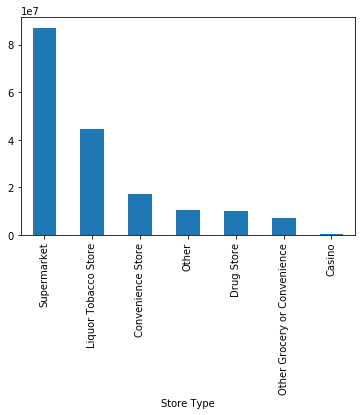

In [87]:
# Volume Sold by Store type 
# Supermarkets sell the most liquor
store_type_g['Volume Sold'].sum().sort_values(ascending=False).plot.bar()

In [88]:
# boxplots showing montly sales volume category may be better way to represent volume sales by store type
fig = px.box(store_type_m_g.sum().sort_values(by='Volume Sold',ascending=False).reset_index(), 
             x = 'Store Type',
             y ='Volume Sold',
             title='Monthly Sales Volume by Store Type')
fig

## Seasonality by store type based off of sales volume

In [ ]:
# GROUP BY YEAR AND SEE TREND

In [91]:
# Use groupby defined earlier
store_vol = store_type_m_g[['Volume Sold']].sum().reset_index()

# Pivot to get line graph
store_vol = store_vol.pivot(index = 'Date', 
                           columns = 'Store Type', 
                           values = 'Volume Sold').reset_index()

# Figure showing volume sold by store category over the months
# Takeaway: Seasonality shows up in all categories except Casino(too small). 
# Largest fluctuations seem to result from Grocery stores then Liquor and then Drug stores. 
# Convenience store sales might be on the rise
fig = px.line(store_vol, x='Date', y=store_vol.columns, title='Volume Sold by Month and Store Type')
fig

### Overall Volume Sales by month

In [92]:
fig = px.line(store_m_g.sum().reset_index(), 
              x='Date', 
              y='Volume Sold', 
              title='Total Volume Sold by Month')
fig
# Overall upward trend

## Store Life Cycle

New stores pop up and some of them shut down after a few years. Analyze the store opening dynamics and report the findings on store life-cycle, store survival analysis, survial curve, survival probabilities, etc. Refine your findings based on the store categories you design. Is it easy for the stores to experience sales volume growth? With new stores popping up for competition, how does it affect the sales of the existing stores?
Does the pie (Gross sales volume in Iowa) grow bigger? Do the stores share the bigger pie? Does the winner take all or more players share smaller slices



###  Overall Longevity

In [93]:
store_lon = store_df.groupby(['Store Number']).agg({'Date': 
                                        (lambda x: (max(x)-min(x)).days)}).sort_values(by='Date',
                                                                                ascending=False).reset_index()

In [94]:
store_lon.describe()

,Date
count,2448.000000
mean,1733.835376
std,1154.605595
min,0.000000
25%,653.000000
50%,1596.500000
75%,3129.000000
max,3163.000000


In [95]:
fig = px.histogram(store_lon['Date'], nbins=30)
fig.update_layout(
    title='Store Longevity',
    xaxis_title="Number of Days Open",
    legend_title="",
    )
fig

### Store-type Longevity

In [96]:
store_t_lon = store_df.groupby(['Store Type', 
                                'Store Number']).agg({'Date':
                                                      (lambda x: 
                                                       (max(x)-min(x)).days)}).sort_values(by='Date',
                                                                                           ascending=False).reset_index()
store_t_lon.head(3)

,Store Type,Store Number,Date
0,Supermarket,4250,3163
1,Liquor Tobacco Store,2190,3163
2,Liquor Tobacco Store,2465,3163


In [97]:
fig = px.box(store_t_lon, 
             x = 'Store Type',
             y ='Date',
             title='Longevity by Store Type')
fig
# doesnt take into consideration stores that opened more recently

## Number of Stores over years

In [98]:
store_df.head()
# count number of unique stores each time period (m)

,Date,Store Number,Sale,Volume Sold,County,Store Type
0,2012-05-03,2636,123.60,21.0,polk,Liquor Tobacco Store
1,2012-07-05,3735,15.84,1.2,buchanan,Liquor Tobacco Store
2,2012-03-06,4631,116.88,9.0,black hawk,Other
3,2013-08-26,3162,80.28,10.5,muscatine,Other Grocery or Convenience
4,2015-08-12,2513,22.48,1.5,johnson,Supermarket


In [99]:
# overlay number of stores closed as well (no purchase for 6 months)
# think about the ratio of closure/open

In [100]:
fig = px.line(store_m_g.agg({'Store Number': pd.Series.nunique}).reset_index(), 
              x='Date', y='Store Number', title='Store Growth')
fig

In [101]:
# For some stores with long longevity how sales change over time

In [103]:
store_type_nu = store_type_m_g.agg({'Store Number': pd.Series.nunique}).reset_index().pivot(index= 'Date', columns = 'Store Type', values = 'Store Number').reset_index()

fig = px.line(store_type_nu, x='Date', y=store_type_nu.columns, title='')
fig
# Number of convenience stores is growing rapidly